Lets run a softmax activation

In [1]:
import tensorflow as tf 
print(tf.__version__)

2024-10-20 15:36:37.533243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 15:36:38.590201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

# Get TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check for available GPUs and CUDA support
print(device_lib.list_local_devices())

# Check CUDA and cuDNN versions (these are logged at startup)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("CUDA version:", tf.sysconfig.get_build_info().get("cuda_version"))
print("cuDNN version:", tf.sysconfig.get_build_info().get("cudnn_version"))

TensorFlow version: 2.16.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3772746397974564819
xla_global_id: -1
]
Built with CUDA: True
CUDA version: 12.3
cuDNN version: 8


2024-10-20 15:36:42.776590: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-20 15:36:42.815898: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-10-20 15:36:51.763803: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-20 15:36:51.763893: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
from sklearn.datasets import make_blobs

In [8]:
classes=4
m=100
centers=[[1,1], [3,3],[2,6],[6,7]]
std=1
X_train, y_train=make_blobs(n_samples=m, centers=centers,cluster_std=std, random_state=30)

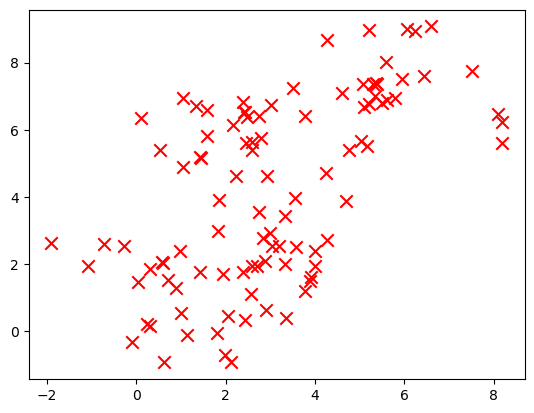

In [9]:
fig, ax = plt.subplots()                     # fig is the figure, ax is the axes
ax.scatter(X_train[:,0], X_train[:,1], marker='x',
              s=80, c='red', label='y=1')

In [10]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:12]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0 2 1]
shape of X_train: (100, 2), shape of y_train: (100,)


2.2 Model

This lab will use a 2-layer network as shown. Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a linear rather than a softmax activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [11]:
tf.random.set_seed(1234)
model=Sequential(
    [
        Dense(2, activation='relu', name='L1' ),
        Dense(4, activation='linear', name='L2')
    ]
)

In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9143
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5369
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2567
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0312 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8495
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7051
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5910 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4999 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4264
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3667
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3148
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2793
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2479 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2226 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2019
Epoch 16/200
4/4 ━━━━━━━━━━━━

In [15]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()
print(W1,b1)

[[0.09444261 1.327616  ]
 [1.1748523  0.28660145]] [-2.8650525 -1.4667925]


In [16]:
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)